In [1]:
from thermalcognition.reader import *
from thermalcognition.align import *
from thermalcognition.landmarks import *
from thermalcognition.vitals import *
from matplotlib import pyplot as plt
import skimage.io
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

This notebook demonstrates how to detect changes of temperature on face. 

# Nose temperature tracking

Useful for detection respiratory events

In [2]:
video_path = r"../data/FLIR0131.csq"
video_flir = read_flir_video(video_path)
frame_index = 0
# image = video_flir[frame_index]
left= 290
top = 140
right= 335
bottom = 170
crops = left, top, right, bottom
nose_video = crop_face(video_flir, crops=crops, mode="thermal")

100%|██████████| 361/361 [00:02<00:00, 134.70it/s]


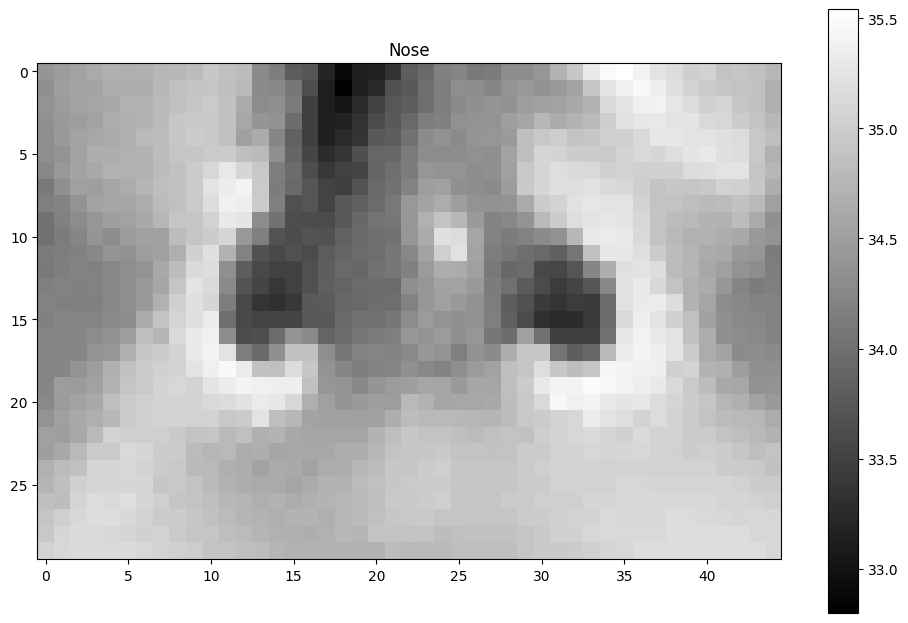

In [8]:
plt.imshow(nose_video[0], cmap="gray")
plt.title("Nose")
plt.colorbar()

Text(0.5, 1.0, 'Spectrum')

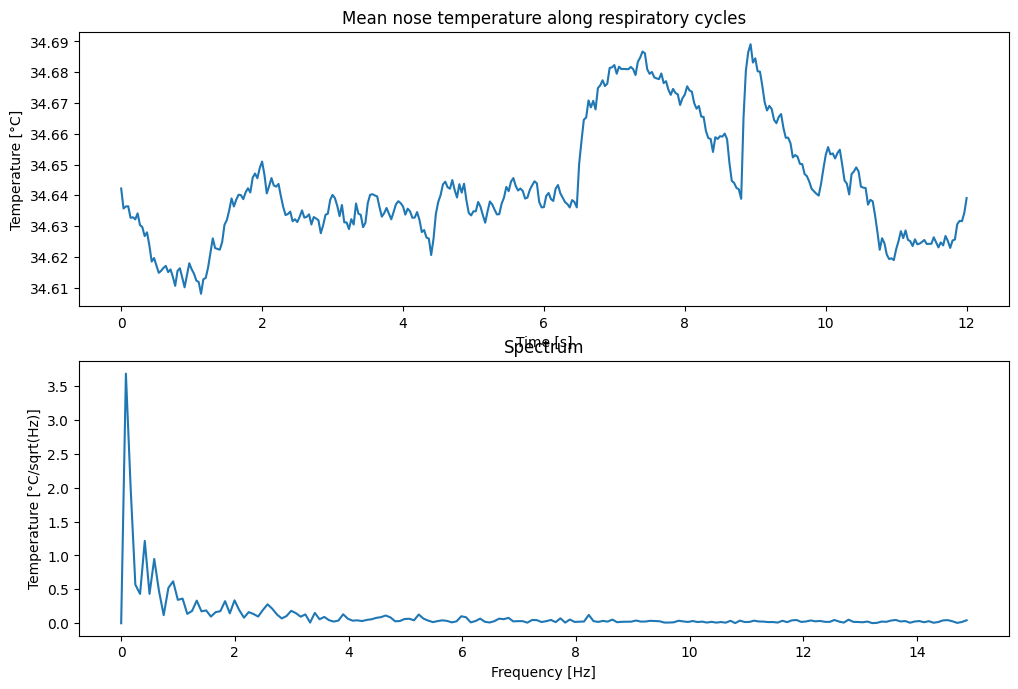

In [10]:
nose_temperature = get_1dstatistics(nose_video, mode="mean")
nose_temperature_fft = roi_fourier_1dspectrum(nose_video, mode="mean")
fps = 30
t = np.arange(len(nose_temperature))/fps
f = fps*np.arange(len(nose_temperature)//2)/len(nose_temperature)
plt.subplot(211)
plt.plot(t, nose_temperature)
plt.ylabel("Temperature [°C]")
plt.xlabel("Time [s]")
plt.title("Mean nose temperature along respiratory cycles")
plt.subplot(212)
plt.plot(f, nose_temperature_fft)
plt.ylabel("Temperature [°C/sqrt(Hz)]")
plt.xlabel("Frequency [Hz]")
plt.title("Spectrum")

Stationary spectrum is not enough for tracking the following respiratory events : 
- inspiration between 0" and 1"
- inspiration between 9" and 11""

# Forehead temperature tracking

In [11]:
left= 290
top = 90
right= 335
bottom = 110
crops = left, top, right, bottom
forehead_video = crop_face(video_flir, crops=crops, mode="thermal")

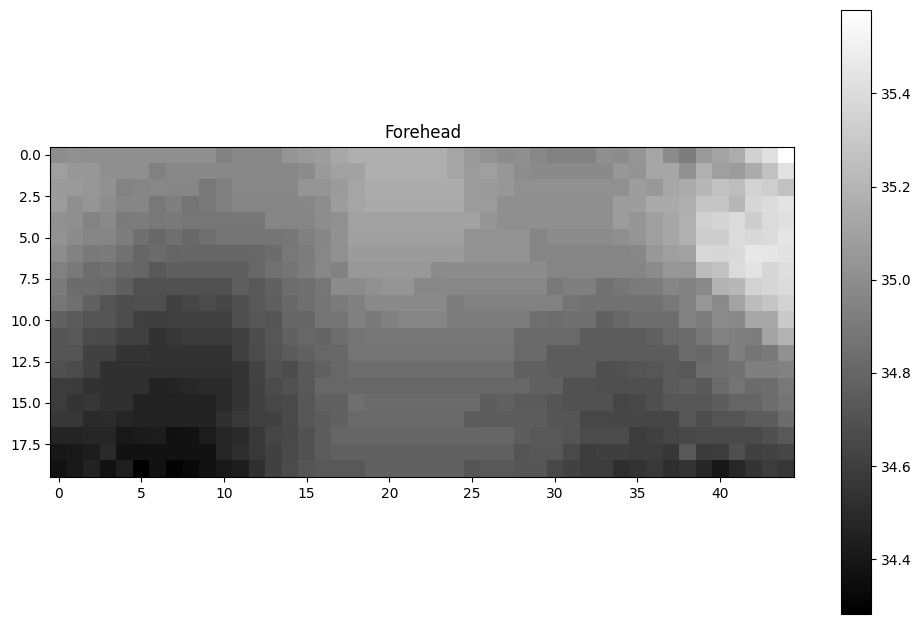

In [13]:
plt.imshow(forehead_video[0], cmap="gray")
plt.title("Forehead")
plt.colorbar()

Text(0.5, 1.0, 'Spectrum')

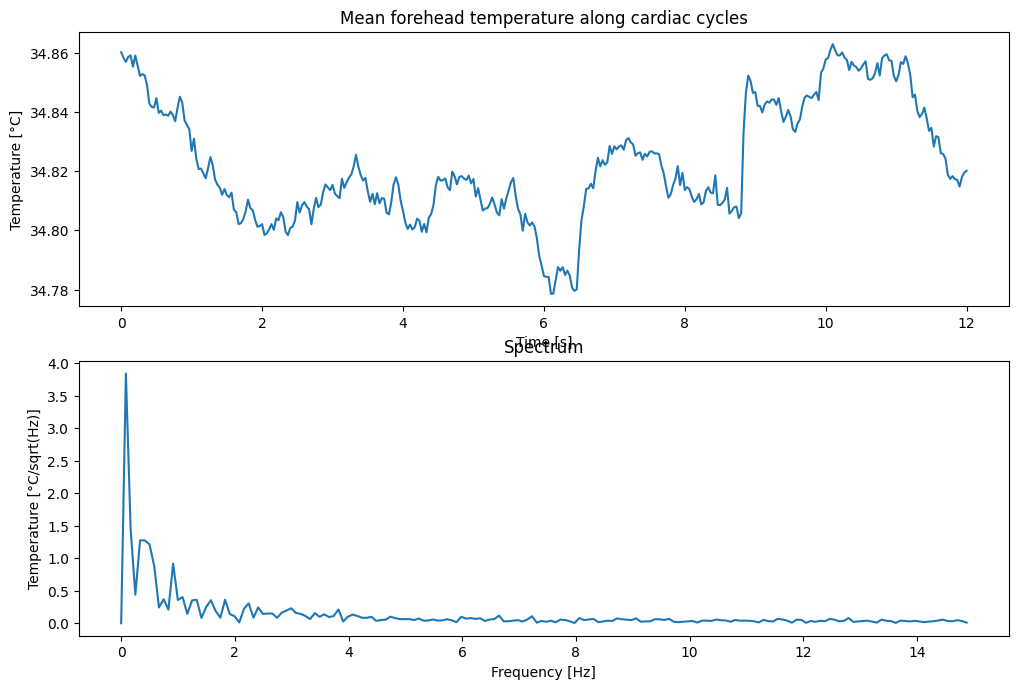

In [14]:
forehead_temperature = get_1dstatistics(forehead_video, mode="mean")
forehead_temperature_fft = roi_fourier_1dspectrum(forehead_video, mode="mean")
fps = 30
t = np.arange(len(forehead_temperature))/fps
f = fps*np.arange(len(forehead_temperature)//2)/len(forehead_temperature)
plt.subplot(211)
plt.plot(t, forehead_temperature)
plt.ylabel("Temperature [°C]")
plt.xlabel("Time [s]")
plt.title("Mean forehead temperature along cardiac cycles")
plt.subplot(212)
plt.plot(f, forehead_temperature_fft)
plt.ylabel("Temperature [°C/sqrt(Hz)]")
plt.xlabel("Frequency [Hz]")
plt.title("Spectrum")

The forehead is more useful for cardiac activity, and will be less prone to artifacts than nose. 

# Line temperature tracking

The temperature can be tracked as a statistics of a ROI (region of interest) ; but also as a line along time. In the latter case, more information can be detected in one plot.  

In [ ]:
video_path = r"../data/2020_01_23_Coralynn.mpg"
videodata = read_testo_video(video_path)

  9%|▉         | 31/343 [00:10<01:48,  2.88it/s]

In [29]:
duration, nb_frames, fps = get_video_info(video_path)

In [30]:
n = 1500 # 1 minute
videodata = videodata[:n]
videodata = videodata.astype("float64")
# videodata = videodata[:,:,:,np.newaxis]

In [46]:
landmarks_detector_path = r"../weights/2DFAN4-11f355bf06.pth.tar"
face_detector_path = r"../weights/s3fd-619a316812.pth"
device = "cpu"
landmarks_df = predict_landmarks_video(videodata, video_path, landmarks_detector_path, face_detector_path, n_landmarks=68, decimate=1, dpi=100, device=device, save=False)

1500it [10:52,  2.30it/s]


In [76]:
temp_matrix = get_matrix_temp(videodata, landmarks_df)
plt.imshow(temp_matrix, cmap="gray")
plt.colorbar()

1500it [00:00, 2487.68it/s]


In [90]:
# max_temperature = filter_physio(temp_matrix, fps=100)